<a href="https://colab.research.google.com/github/guidoluizf/projetos/blob/main/Projeto_001_An%C3%A1lise_Explorat%C3%B3ria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Análise Exploratória de Dados: Caso Prático

## 1.1 Importando e instalando bibliotecas

Nessa seção iremos instalar e importar as bibliotecas que serão utilizadas ao longo do projeto.

In [ ]:
!pip install sweetviz
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 27.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import yfinance as yf
import sweetviz as sv

import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 Configurando a visualização dos dados

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

## 1.3 Fazendo a Seleção dos Ativos (TICKERS) que vão compor o estudo

Para o estudo em questão, selecionamos todas as empresas do setor de **Utilidade Pública/Energia Elétrica**

In [ ]:
selecao = ['CMIG4.SA', 'CPLE6.SA', 'CPFE3.SA', 'ELET3.SA', 'ELET6.SA', 'ENGI11.SA', 'ENEV3.SA', 'EGIE3.SA', 'EQTL3.SA', 'TAEE11.SA']

### 1.3.1 Capturando os dados direto do yfinance

In [ ]:
dados = pd.DataFrame()
for i in selecao:
  fund_data= yf.Ticker(i)
  df = pd.DataFrame([fund_data.info.values()], columns = fund_data.info.keys())

  df['selecao'] = i
  dados = dados.append(df)

<ipython-input-5-0a130e81d7e1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados = dados.append(df)
<ipython-input-5-0a130e81d7e1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados = dados.append(df)
<ipython-input-5-0a130e81d7e1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados = dados.append(df)
<ipython-input-5-0a130e81d7e1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados = dados.append(df)
<ipython-input-5-0a130e81d7e1>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados = dados.append(df)
<ipython-input-5-0a130e81d7e1>

**O que foi feito:**

1) Criamos um novo DataFrame.

2) Criamos uma estrutura de repetição que pega todos os dados do Yahoo Finance de cada empresa, uma de cada vez.

3) dentro da mesma estrutura de repetição, fizemos a colocação dos dados: linhas recebendo os valores e colunas recebendo a descrição dos valores.

4) Por fim, essas informações de linhas e colunas foram inseridas no DataFrame inicial.

### 1.3.2 Conferência de informações do Novo DataFrame

Para facilitar a exploração dos dados, criamos uma coluna "index" que corresponde ao TICKER de cada companhia:

In [ ]:
dados.index = dados['selecao']
dados.head()

,address1,city,state,zip,country,phone,website,industry,industryDisp,sector,sectorDisp,longBusinessSummary,fullTimeEmployees,companyOfficers,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,trailingPE,forwardPE,volume,regularMarketVolume,averageVolume,averageVolume10days,averageDailyVolume10Day,bid,ask,bidSize,askSize,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,...,enterpriseToRevenue,enterpriseToEbitda,52WeekChange,SandP52WeekChange,lastDividendValue,lastDividendDate,exchange,quoteType,symbol,underlyingSymbol,shortName,longName,firstTradeDateEpochUtc,timeZoneFullName,timeZoneShortName,uuid,messageBoardId,gmtOffSetMilliseconds,currentPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,quickRatio,currentRatio,totalRevenue,debtToEquity,revenuePerShare,returnOnAssets,returnOnEquity,grossProfits,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,selecao,address2,fax
selecao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CMIG4.SA,"Avenida Barbacena, 1200",Belo Horizonte,MG,30190-131,Brazil,55 31 3506 5024,https://www.cemig.com.br,Utilities—Diversified,Utilities—Diversified,Utilities,Utilities,"Companhia Energética de Minas Gerais - CEMIG, through its subsidiaries, engages in the generatio...",4969.0,"[{'maxAge': 1, 'name': 'Mr. Reynaldo Passanezi Filho', 'age': 57, 'title': 'CEO, Pres & Member o...",2.0,3.0,2.0,6.0,2.0,1.693526e+09,86400,2,12.80,12.83,12.65,12.95,12.80,12.83,12.65,12.95,0.73,0.0573,1687737600,0.4746,5.72,0.522273,5.373950,6.876344,6356900,6356900,8490903,7146288,7146288,12.80,12.81,0,0,33585006592,10.07,13.12,...,1.023,4.485,0.094017,0.14114,0.193907,1687737600,SAO,EQUITY,CMIG4.SA,CMIG4.SA,CEMIG PN N1,Companhia Energética de Minas Gerais - CEMIG,946900800,America/Sao_Paulo,BRT,2dc09ca5-9c3f-34b4-8a5c-3ece16a9ac24,finmb_411574,-10800000,12.79,14.0,11.50,12.84,13.0,2.9,hold,9,3725801984,1.693,8181767168,12247118848,1.126,1.337,35868434432,51.862,16.300,0.08166,0.23793,5.259834e+09,329465376,6344716800,24.136,0.074,0.19762,0.22810,0.19628,BRL,None,CMIG4.SA,NaN,NaN
CPLE6.SA,"Rua José Izidoro Biazetto, 158",Curitiba,PR,81200-240,Brazil,55 41 3331 4011,https://www.copel.com,Utilities—Diversified,Utilities—Diversified,Utilities,Utilities,"Companhia Paranaense de Energia - COPEL engages in the generation, transformation, distribution,...",5993.0,"[{'maxAge': 1, 'name': 'Mr. Daniel Pimentel Slaviero', 'age': 42, 'title': 'CEO & Member of Exec...",2.0,1.0,4.0,6.0,1.0,1.693526e+09,86400,2,9.07,9.07,8.86,9.12,9.07,9.07,8.86,9.12,0.47,0.0523,1669075200,0.5348,5.51,0.401928,12.869565,11.384616,16602200,16602200,15249623,17603144,17603144,8.90,8.91,0,0,25877118976,6.18,9.15,...,1.694,8.745,0.341716,0.14114,0.367323,1669075200,SAO,EQUITY,CPLE6.SA,CPLE6.SA,COPEL PNB N2,Companhia Paranaense de Energia - COPEL,946900800,America/Sao_Paulo,BRT,cfac20e6-275d-3a32-af06-6623fde905ab,finmb_392996,-10800000,8.88,13.0,6.76,10.71,12.0,2.0,buy,9,4447578112,1.625,4255097088,16588238848,1.431,1.467,21971798016,75.364,8.029,0.03617,0.09056,NaN,786801344,3173899008,NaN,0.019,0.21631,0.19366,0.13603,BRL,None,CPLE6.SA,Bloco A,NaN
CPFE3.SA,"Rua Jorge Figueiredo CorrEa, no 1.632",Campinas,SP,13087-397,Brazil,NaN,https://www.cpfl.com.br,Utilities—Regulated Electric,Utilities—Regulated Electric,Utilities,Utilities,"CPFL Energia S.A. generates, transmits, distributes, and commercializes electricity to residenti...",NaN,"[{'maxAge': 1, 'name': 'Mr. Gustavo Estrella', 'age': 48, 'title': 'CEO, Member of Exec. Board ...",2.0,4.0,5.0,5.0,3

In [ ]:
dados.shape

(10, 125)

In [ ]:
dados.columns

Index(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website',
       'industry', 'industryDisp', 'sector',
       ...
       'earningsGrowth', 'revenueGrowth', 'grossMargins', 'ebitdaMargins',
       'operatingMargins', 'financialCurrency', 'trailingPegRatio', 'selecao',
       'address2', 'fax'],
      dtype='object', length=125)

Organizando as chaves ou "colunas", temos:

In [ ]:
list(dados.columns)

['address1',
 'city',
 'state',
 'zip',
 'country',
 'phone',
 'website',
 'industry',
 'industryDisp',
 'sector',
 'sectorDisp',
 'longBusinessSummary',
 'fullTimeEmployees',
 'companyOfficers',
 'auditRisk',
 'boardRisk',
 'compensationRisk',
 'shareHolderRightsRisk',
 'overallRisk',
 'governanceEpochDate',
 'maxAge',
 'priceHint',
 'previousClose',
 'open',
 'dayLow',
 'dayHigh',
 'regularMarketPreviousClose',
 'regularMarketOpen',
 'regularMarketDayLow',
 'regularMarketDayHigh',
 'dividendRate',
 'dividendYield',
 'exDividendDate',
 'payoutRatio',
 'fiveYearAvgDividendYield',
 'beta',
 'trailingPE',
 'forwardPE',
 'volume',
 'regularMarketVolume',
 'averageVolume',
 'averageVolume10days',
 'averageDailyVolume10Day',
 'bid',
 'ask',
 'bidSize',
 'askSize',
 'marketCap',
 'fiftyTwoWeekLow',
 'fiftyTwoWeekHigh',
 'priceToSalesTrailing12Months',
 'fiftyDayAverage',
 'twoHundredDayAverage',
 'trailingAnnualDividendRate',
 'trailingAnnualDividendYield',
 'currency',
 'enterpriseValue',
 

## 1.4 Análise dos dados e Seleção de Informações: Uso da biblioteca SWEETVIZ

### 1.4.1 Geração de relatório de dados com as principais informações coletadas: uso do SWEETVIZ

Ao trazer as informações de 'companyOfficers', que são os grandes executivos de cada companhia, os dados vieram em formato de lista, que não permite alterações. Logo, a ferramenta de geração de relatório do SWEETVIZ não poderia ser usada. Portanto, excluímos a coluna 'companyOfficers' para que os dados das demais colunas fossem utilizados de maneira adequada.

In [ ]:
dados.drop(['companyOfficers'], axis=1, inplace=True)

In [ ]:
dados

,address1,city,state,zip,country,phone,website,industry,industryDisp,sector,sectorDisp,longBusinessSummary,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,trailingPE,forwardPE,volume,regularMarketVolume,averageVolume,averageVolume10days,averageDailyVolume10Day,bid,ask,bidSize,askSize,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToSalesTrailing12Months,...,enterpriseToRevenue,enterpriseToEbitda,52WeekChange,SandP52WeekChange,lastDividendValue,lastDividendDate,exchange,quoteType,symbol,underlyingSymbol,shortName,longName,firstTradeDateEpochUtc,timeZoneFullName,timeZoneShortName,uuid,messageBoardId,gmtOffSetMilliseconds,currentPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,quickRatio,currentRatio,totalRevenue,debtToEquity,revenuePerShare,returnOnAssets,returnOnEquity,grossProfits,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,selecao,address2,fax
selecao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CMIG4.SA,"Avenida Barbacena, 1200",Belo Horizonte,MG,30190-131,Brazil,55 31 3506 5024,https://www.cemig.com.br,Utilities—Diversified,Utilities—Diversified,Utilities,Utilities,"Companhia Energética de Minas Gerais - CEMIG, through its subsidiaries, engages in the generatio...",4969.0,2.0,3.0,2.0,6.0,2.0,1.693526e+09,86400,2,12.80,12.83,12.65,12.95,12.80,12.83,12.65,12.95,0.73,0.0573,1687737600,0.4746,5.72,0.522273,5.373950,6.876344,6356900,6356900,8490903,7146288,7146288,12.80,12.81,0,0,33585006592,10.07,13.12,0.936339,...,1.023,4.485,0.094017,0.14114,0.193907,1687737600,SAO,EQUITY,CMIG4.SA,CMIG4.SA,CEMIG PN N1,Companhia Energética de Minas Gerais - CEMIG,946900800,America/Sao_Paulo,BRT,2dc09ca5-9c3f-34b4-8a5c-3ece16a9ac24,finmb_411574,-10800000,12.79,14.00,11.50,12.84,13.00,2.9,hold,9,3725801984,1.693,8181767168,12247118848,1.126,1.337,35868434432,51.862,16.300,0.08166,0.23793,5.259834e+09,329465376,6344716800,24.136,0.074,0.19762,0.22810,0.19628,BRL,None,CMIG4.SA,NaN,NaN
CPLE6.SA,"Rua José Izidoro Biazetto, 158",Curitiba,PR,81200-240,Brazil,55 41 3331 4011,https://www.copel.com,Utilities—Diversified,Utilities—Diversified,Utilities,Utilities,"Companhia Paranaense de Energia - COPEL engages in the generation, transformation, distribution,...",5993.0,2.0,1.0,4.0,6.0,1.0,1.693526e+09,86400,2,9.07,9.07,8.86,9.12,9.07,9.07,8.86,9.12,0.47,0.0523,1669075200,0.5348,5.51,0.401928,12.869565,11.384616,16602200,16602200,15249623,17603144,17603144,8.90,8.91,0,0,25877118976,6.18,9.15,1.177742,...,1.694,8.745,0.341716,0.14114,0.367323,1669075200,SAO,EQUITY,CPLE6.SA,CPLE6.SA,COPEL PNB N2,Companhia Paranaense de Energia - COPEL,946900800,America/Sao_Paulo,BRT,cfac20e6-275d-3a32-af06-6623fde905ab,finmb_392996,-10800000,8.88,13.00,6.76,10.71,12.00,2.0,buy,9,4447578112,1.625,4255097088,16588238848,1.431,1.467,21971798016,75.364,8.029,0.03617,0.09056,NaN,786801344,3173899008,NaN,0.019,0.21631,0.19366,0.13603,BRL,None,CPLE6.SA,Bloco A,NaN
CPFE3.SA,"Rua Jorge Figueiredo CorrEa, no 1.632",Campinas,SP,13087-397,Brazil,NaN,https://www.cpfl.com.br,Utilities—Regulated Electric,Utilities—Regulated Electric,Utilities,Utilities,"CPFL Energia S.A. generates, transmits, distributes, and commercializes electricity to residenti...",NaN,2.0,4.0,5.0,5.0,3.0,1.693526e+09,86400,2,35.61,35.59,35.50,35.94,35.61,35.59,35.50,35.94,5.34,0.1516,1692316800,0.4371,NaN,0.495013,7.428275,8.568345,1352400,1352400,1723187,1487088,1487088,35.67,35.74,0,0,41169891328,28.91,37.04,1.030004,...,1.622,4.937,0.028299,0.14114,0.783358,169231

In [ ]:
 report = sv.analyze(dados)
 report.show_html('Relatorio.html')

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, 

Report Relatorio.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 1.4.2 Trazendo algumas variáveis para a análise

Agora, iremos destacar alguns indicadores para o estudo em questão:

In [ ]:
dados.head(1)

,address1,city,state,zip,country,phone,website,industry,industryDisp,sector,sectorDisp,longBusinessSummary,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,trailingPE,forwardPE,volume,regularMarketVolume,averageVolume,averageVolume10days,averageDailyVolume10Day,bid,ask,bidSize,askSize,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToSalesTrailing12Months,...,enterpriseToRevenue,enterpriseToEbitda,52WeekChange,SandP52WeekChange,lastDividendValue,lastDividendDate,exchange,quoteType,symbol,underlyingSymbol,shortName,longName,firstTradeDateEpochUtc,timeZoneFullName,timeZoneShortName,uuid,messageBoardId,gmtOffSetMilliseconds,currentPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,quickRatio,currentRatio,totalRevenue,debtToEquity,revenuePerShare,returnOnAssets,returnOnEquity,grossProfits,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,selecao,address2,fax
selecao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CMIG4.SA,"Avenida Barbacena, 1200",Belo Horizonte,MG,30190-131,Brazil,55 31 3506 5024,https://www.cemig.com.br,Utilities—Diversified,Utilities—Diversified,Utilities,Utilities,"Companhia Energética de Minas Gerais - CEMIG, through its subsidiaries, engages in the generatio...",4969.0,2.0,3.0,2.0,6.0,2.0,1.693526e+09,86400,2,12.8,12.83,12.65,12.95,12.8,12.83,12.65,12.95,0.73,0.0573,1687737600,0.4746,5.72,0.522273,5.37395,6.876344,6356900,6356900,8490903,7146288,7146288,12.8,12.81,0,0,33585006592,10.07,13.12,0.936339,...,1.023,4.485,0.094017,0.14114,0.193907,1687737600,SAO,EQUITY,CMIG4.SA,CMIG4.SA,CEMIG PN N1,Companhia Energética de Minas Gerais - CEMIG,946900800,America/Sao_Paulo,BRT,2dc09ca5-9c3f-34b4-8a5c-3ece16a9ac24,finmb_411574,-10800000,12.79,14.0,11.5,12.84,13.0,2.9,hold,9,3725801984,1.693,8181767168,12247118848,1.126,1.337,35868434432,51.862,16.3,0.08166,0.23793,5.259834e+09,329465376,6344716800,24.136,0.074,0.19762,0.2281,0.19628,BRL,None,CMIG4.SA,NaN,NaN


In [ ]:
dados_modif = dados[['state','industry','payoutRatio','beta','recommendationKey','returnOnAssets','returnOnEquity','freeCashflow','grossMargins','ebitdaMargins','operatingMargins']]

Fazendo mais um ajuste: deletamos uma das colunas 'selecao' que estava em duplicidade:

In [ ]:
dados_modif.head(1)

,state,industry,payoutRatio,beta,recommendationKey,returnOnAssets,returnOnEquity,freeCashflow,grossMargins,ebitdaMargins,operatingMargins
selecao,,,,,,,,,,,
CMIG4.SA,MG,Utilities—Diversified,0.4746,0.522273,hold,0.08166,0.23793,329465376,0.19762,0.2281,0.19628


Por fim, finalizamos a parte de tratamento dos dados. Partimos, agora, para as análises propriamente ditas: univariadas, bivariadas. multivariadas.

## 1.5 Análise univariada dos dados

Abaixo temos a quantidade de linhas e colunas do DataFrame modificado. São 10 linhas e 11 colunas.

In [ ]:
dados_modif.shape

(10, 11)

o funçao info() no fornece os tipos de cada uma das variáveis do DataFrame modificado:

In [ ]:
dados_modif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, CMIG4.SA to TAEE11.SA
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              9 non-null      object 
 1   industry           10 non-null     object 
 2   payoutRatio        8 non-null      float64
 3   beta               10 non-null     float64
 4   recommendationKey  10 non-null     object 
 5   returnOnAssets     10 non-null     float64
 6   returnOnEquity     10 non-null     float64
 7   freeCashflow       10 non-null     int64  
 8   grossMargins       10 non-null     float64
 9   ebitdaMargins      10 non-null     float64
 10  operatingMargins   10 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 960.0+ bytes


### 1.5.1 - Separação as variáveis: Quantitativas e Categóricas

Primeiro, vamos selecionar as variáveis numéricas ou quantitativas:

In [ ]:
quantitativas = dados_modif.select_dtypes(include=[np.float64])

In [ ]:
list(quantitativas.columns)

['payoutRatio',
 'beta',
 'returnOnAssets',
 'returnOnEquity',
 'grossMargins',
 'ebitdaMargins',
 'operatingMargins']

In [ ]:
quantitativas.dtypes

payoutRatio         float64
beta                float64
returnOnAssets      float64
returnOnEquity      float64
grossMargins        float64
ebitdaMargins       float64
operatingMargins    float64
dtype: object

Depois, selecionamentos as variáveis categóricas (em geral, geram textos como "outputs"):

In [ ]:
categoricas = dados_modif.select_dtypes(include=[object])

In [ ]:
categoricas.dtypes

state                object
industry             object
recommendationKey    object
dtype: object

### 1.5.2 Análise das variáveis quantitativas

Nessa etapa da análise quantitativa, faremos algumas manipulações adicionais e também vamos gerar algumas dados estatísticos bem conhecidos: média, desvio padrão, quartis, etc.

In [ ]:
quantitativas.describe()

,payoutRatio,beta,returnOnAssets,returnOnEquity,grossMargins,ebitdaMargins,operatingMargins
count,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.459800,0.454354,0.054232,0.154092,0.397640,0.348169,0.285062
std,0.465444,0.119354,0.026229,0.127615,0.185149,0.133737,0.140794
min,0.000000,0.224069,0.023060,0.017190,0.197620,0.193660,0.136030
25%,0.233050,0.405252,0.035555,0.056630,0.246303,0.253338,0.211885
50%,0.338650,0.427859,0.050855,0.125865,0.333810,0.336620,0.244065
75%,0.489650,0.515458,0.076210,0.219342,0.567300,0.359000,0.271543
max,1.530100,0.673869,0.098930,0.376190,0.713280,0.613570,0.607460


A função abaixo mostra a quantidade de elementos únicos de cada coluna para cada tipo de variável. É interessante notar que, das 10 empresas da análise, há alguns indicadores que se repetem. Descobriremos mais detalhes ao longo do estudo.

In [ ]:
quantitativas.nunique()

payoutRatio         8
beta                9
returnOnAssets      9
returnOnEquity      9
grossMargins        9
ebitdaMargins       9
operatingMargins    9
dtype: int64

Em seguida, conferimos a quantidade de elementos nulos na distribuição de variáveis quantitativas:

In [ ]:
quantitativas.isnull()

,payoutRatio,beta,returnOnAssets,returnOnEquity,grossMargins,ebitdaMargins,operatingMargins
selecao,,,,,,,
CMIG4.SA,False,False,False,False,False,False,False
CPLE6.SA,False,False,False,False,False,False,False
CPFE3.SA,False,False,False,False,False,False,False
ELET3.SA,False,False,False,False,False,False,False
ELET6.SA,False,False,False,False,False,False,False
ENGI11.SA,True,False,False,False,False,False,False
ENEV3.SA,False,False,False,False,False,False,False
EGIE3.SA,False,False,False,False,False,False,False
EQTL3.SA,False,False,False,False,False,False,False


A prova real pode se encontrada a seguir. De fato, temos ENGI11 e TAEE11 sem a informação de Payout:

In [ ]:
quantitativas

,payoutRatio,beta,returnOnAssets,returnOnEquity,grossMargins,ebitdaMargins,operatingMargins
selecao,,,,,,,
CMIG4.SA,0.4746,0.522273,0.08166,0.23793,0.19762,0.22810,0.19628
CPLE6.SA,0.5348,0.401928,0.03617,0.09056,0.21631,0.19366,0.13603
CPFE3.SA,0.4371,0.495013,0.09893,0.34123,0.32049,0.32859,0.27398
ELET3.SA,0.2263,0.405252,0.02306,0.01719,0.58912,0.35900,0.26423
ELET6.SA,1.5301,0.405252,0.02306,0.01719,0.58912,0.35900,0.26423
ENGI11.SA,NaN,0.673869,0.06115,0.16358,0.24186,0.27106,0.22390
ENEV3.SA,0.0000,0.560172,0.03535,0.04532,0.34713,0.34465,0.21787
EGIE3.SA,0.2402,0.444481,0.08123,0.37619,0.50184,0.53663,0.45675
EQTL3.SA,0.2353,0.411236,0.05365,0.11701,0.25963,0.24743,0.20989


### 1.5.3 Análise das variáveis categóricas

Na análise das variáveis categóricas descobrimos que no setor de **Utilidade Pública/Energia Elétrica** nós temos que:

- As empresas desse setor estão espalhadas em 6 estados diferentes.
- Há 3 subsetores ou indústrias dentro do setor maior.
- Temos os 3 níveis de recomendação para suas ações: Compra, Venda e Neutro.

In [ ]:
categoricas.nunique()

state                6
industry             3
recommendationKey    3
dtype: int64

In [ ]:
categoricas

,state,industry,recommendationKey
selecao,,,
CMIG4.SA,MG,Utilities—Diversified,hold
CPLE6.SA,PR,Utilities—Diversified,buy
CPFE3.SA,SP,Utilities—Regulated Electric,hold
ELET3.SA,RJ,Utilities—Renewable,buy
ELET6.SA,RJ,Utilities—Renewable,buy
ENGI11.SA,MG,Utilities—Renewable,buy
ENEV3.SA,RJ,Utilities—Diversified,buy
EGIE3.SA,SC,Utilities—Renewable,hold
EQTL3.SA,DF,Utilities—Regulated Electric,buy


In [ ]:
categoricas.columns

Index(['state', 'industry', 'recommendationKey'], dtype='object')

abaixo temos os subsetores (ou indústrias):

In [ ]:
categoricas['industry'].value_counts()

Utilities—Renewable             4
Utilities—Diversified           3
Utilities—Regulated Electric    3
Name: industry, dtype: int64

Feitas as últimas manipulações de dados, partimos para a visualização dos indicadores.

### 1.5.3 Analisando a distribuição dos dados

Temos, portanto, a análise univariada de cada um dos indicadores escolhidos.

Será feito da seguinte forma:

1) Gráfico de Histograma, avaliando a quantidade de empresas (eixo y) vs Valor do Indicador (eixo x).

2) Gráfico de quartil para avaliar a existência ou não de pontos fora da curva ("outliers") na distribuição do indicador.

#### 1.5.3.1 Variáveis Quantitativas

**Payout**

<Axes: xlabel='payoutRatio', ylabel='Count'>

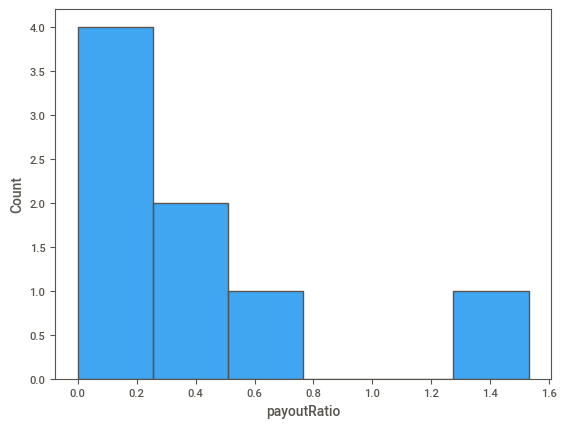

In [ ]:
sns.histplot(data=dados_modif,x='payoutRatio')

<Axes: xlabel='payoutRatio'>

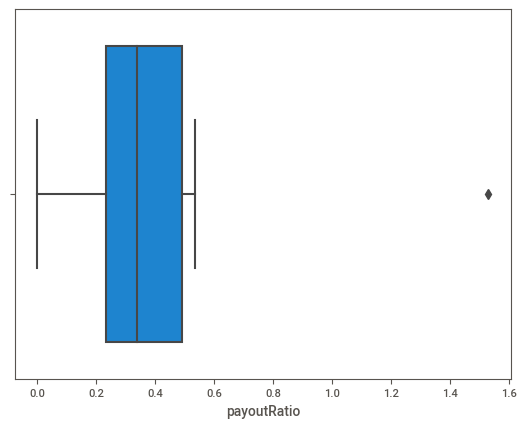

In [ ]:
sns.boxplot(data=dados_modif,x='payoutRatio')

In [ ]:
dados_modif['payoutRatio']

selecao
CMIG4.SA     0.4746
CPLE6.SA     0.5348
CPFE3.SA     0.4371
ELET3.SA     0.2263
ELET6.SA     1.5301
ENGI11.SA       NaN
ENEV3.SA     0.0000
EGIE3.SA     0.2402
EQTL3.SA     0.2353
TAEE11.SA       NaN
Name: payoutRatio, dtype: float64

Podemos checar que tivemos um ponto fora da curva com Eletrobrás (ELET6), que desembolsou um Payout 3x maior do que o segundo colocado (CPLE6).

**Beta**

<Axes: xlabel='beta', ylabel='Count'>

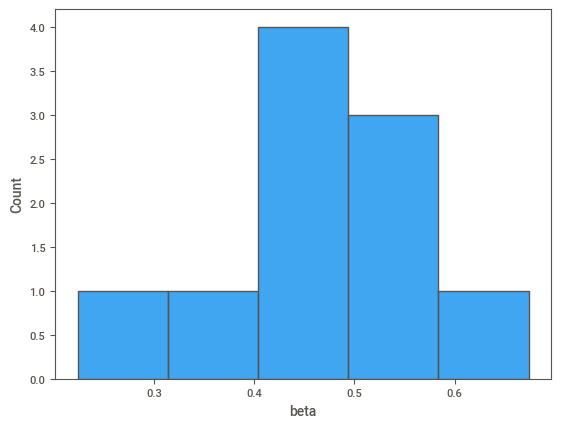

In [ ]:
sns.histplot(data=dados_modif,x='beta')

<Axes: xlabel='beta'>

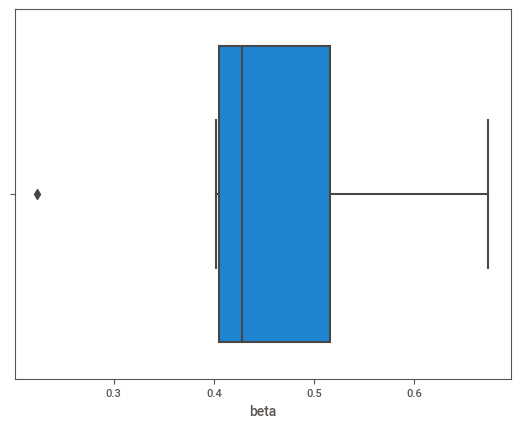

In [ ]:
sns.boxplot(data=dados_modif,x='beta')

In [ ]:
dados_modif['beta']

selecao
CMIG4.SA     0.522273
CPLE6.SA     0.401928
CPFE3.SA     0.495013
ELET3.SA     0.405252
ELET6.SA     0.405252
ENGI11.SA    0.673869
ENEV3.SA     0.560172
EGIE3.SA     0.444481
EQTL3.SA     0.411236
TAEE11.SA    0.224069
Name: beta, dtype: float64

Aqui tivemos outro ponto fora da curva, dessa vez com TAEE11. A empresa apresentou um Beta abaixo de 0.2, que mostra que o movimento da ação é pouco afetado pelo índice IBOV.

**Retornos sobre os Ativos (ROA)**

<Axes: xlabel='returnOnAssets', ylabel='Count'>

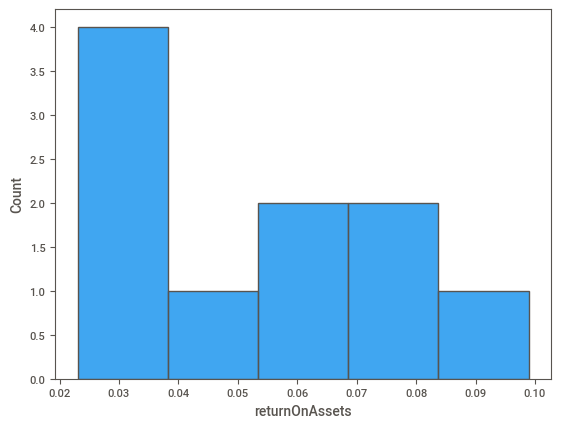

In [ ]:
sns.histplot(data=dados_modif,x='returnOnAssets')

<Axes: xlabel='returnOnAssets'>

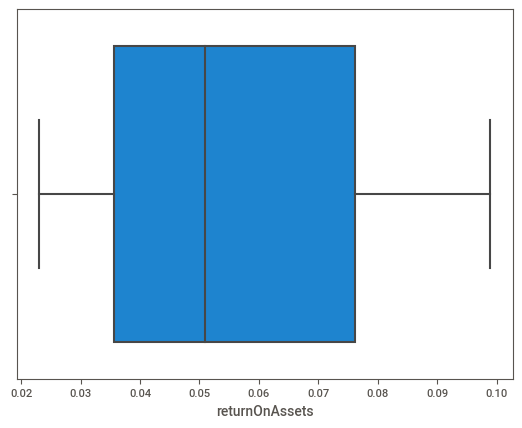

In [ ]:
sns.boxplot(x=quantitativas['returnOnAssets'])

**Retorno sobre Patrimônio Líquido (ROE)**

<Axes: xlabel='returnOnEquity', ylabel='Count'>

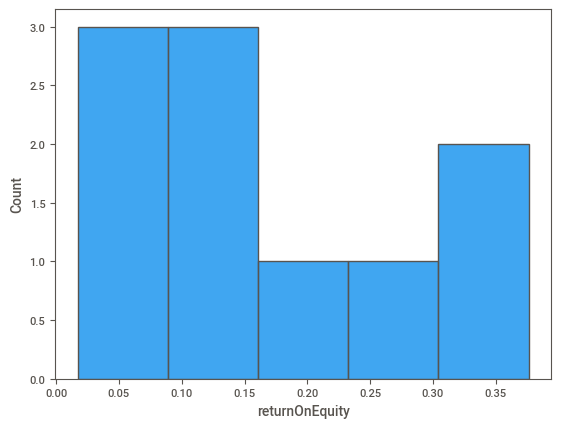

In [ ]:
sns.histplot(data=dados_modif,x='returnOnEquity')

<Axes: xlabel='returnOnEquity'>

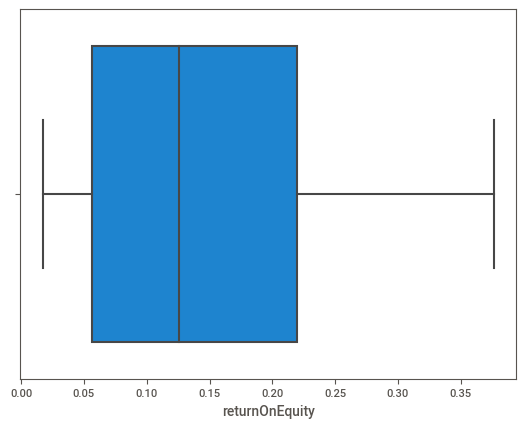

In [ ]:
sns.boxplot(x=quantitativas['returnOnEquity'])

Até aqui, nenhum "outliers".

**Margem Bruta**

<Axes: xlabel='grossMargins', ylabel='Count'>

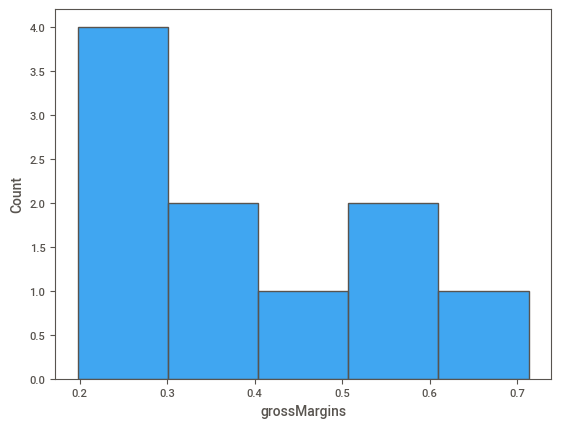

In [ ]:
sns.histplot(data=dados_modif,x='grossMargins')

<Axes: xlabel='grossMargins'>

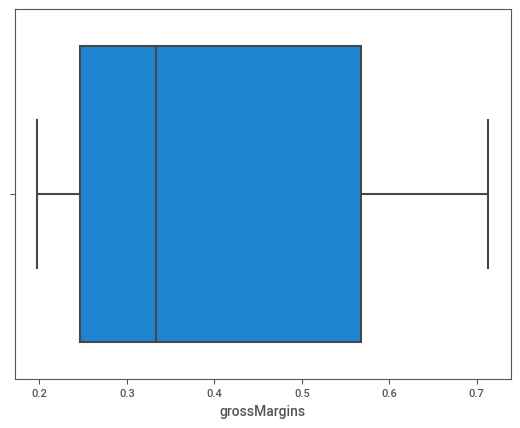

In [ ]:
sns.boxplot(x=quantitativas['grossMargins'])

**Margem EBITDA**

<Axes: xlabel='ebitdaMargins', ylabel='Count'>

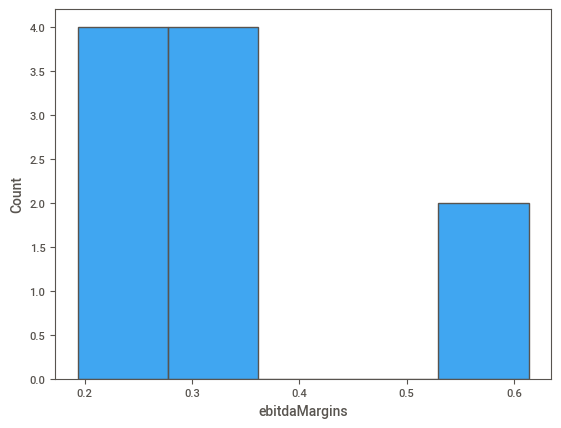

In [ ]:
sns.histplot(data=dados_modif,x='ebitdaMargins')

<Axes: xlabel='ebitdaMargins'>

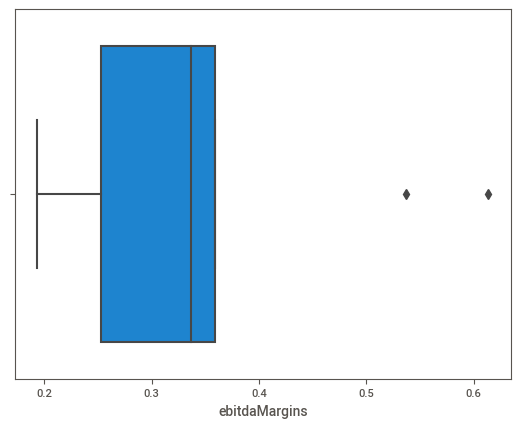

In [ ]:
sns.boxplot(x=quantitativas['ebitdaMargins'])

Encontramos, mais uma vez, um indicador com "outliers", dessa vez sendo dois. Conferindo as informações com a gráfico anterior e com o quadro a seguir, vemos que os pontos fora da curva são de **EGIE3 e TAEE11**.

In [ ]:
dados_modif['ebitdaMargins']

selecao
CMIG4.SA     0.22810
CPLE6.SA     0.19366
CPFE3.SA     0.32859
ELET3.SA     0.35900
ELET6.SA     0.35900
ENGI11.SA    0.27106
ENEV3.SA     0.34465
EGIE3.SA     0.53663
EQTL3.SA     0.24743
TAEE11.SA    0.61357
Name: ebitdaMargins, dtype: float64

**Margem Operacional**

<Axes: xlabel='operatingMargins', ylabel='Count'>

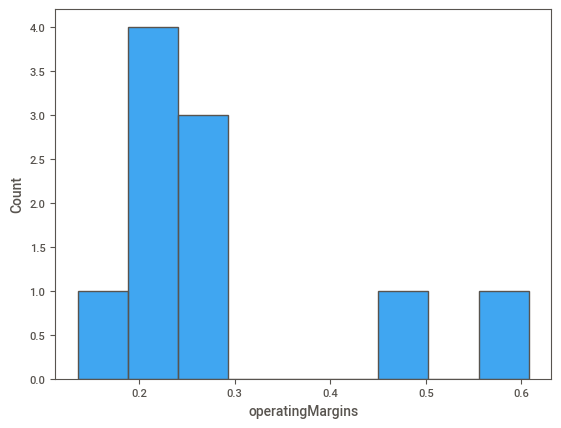

In [ ]:
sns.histplot(data=dados_modif,x='operatingMargins')

<Axes: xlabel='operatingMargins'>

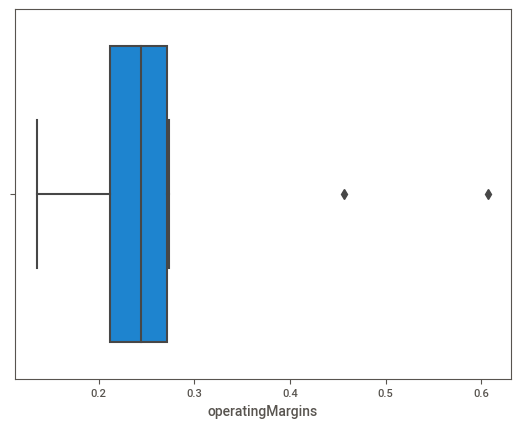

In [ ]:
sns.boxplot(x=quantitativas['operatingMargins'])

In [ ]:
dados_modif['operatingMargins']

selecao
CMIG4.SA     0.19628
CPLE6.SA     0.13603
CPFE3.SA     0.27398
ELET3.SA     0.26423
ELET6.SA     0.26423
ENGI11.SA    0.22390
ENEV3.SA     0.21787
EGIE3.SA     0.45675
EQTL3.SA     0.20989
TAEE11.SA    0.60746
Name: operatingMargins, dtype: float64

Curiosamente (ou não), **TAEE11 e EGIE3** também são pontos fora da curva na análise da margem Operacional.

Trazendo mais algumas análises estatísticas para esses dois indicadores, Margem EBITDA e Margem Operacional, temos:

**Variância**

In [ ]:
round(quantitativas['operatingMargins'].var(),4)

0.0198

In [ ]:
round(quantitativas['ebitdaMargins'].var(),4)

0.0179

**Desvio Padrão**

In [ ]:
round(quantitativas['operatingMargins'].std(),4)

0.1408

In [ ]:
round(quantitativas['ebitdaMargins'].std(),4)

0.1337

#### 1.5.3.2 Variáveis Categóricas

Fazendo uma abordagem das categorias, encontramos a divisão das empresas pelas seguintes variáveis:

**Indústrias**

<Axes: >

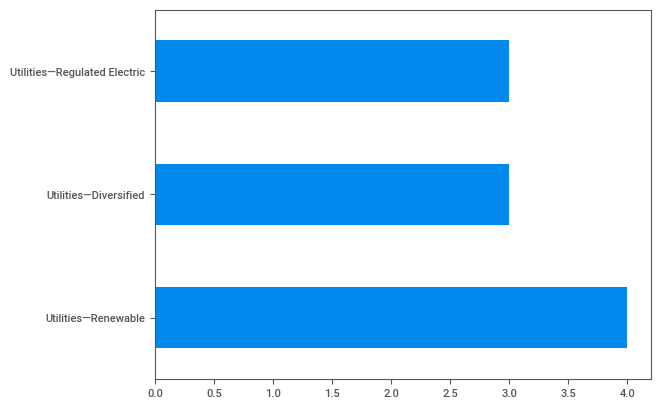

In [ ]:
categoricas['industry'].value_counts().plot(kind='barh')

**Estados da Federação**

<Axes: >

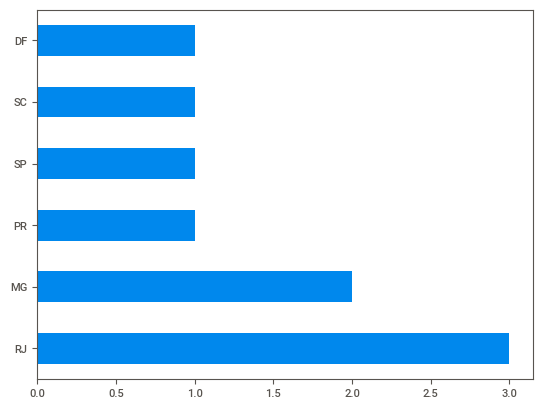

In [ ]:
categoricas['state'].value_counts().plot(kind='barh')

**Recomendação do Papel**

<Axes: >

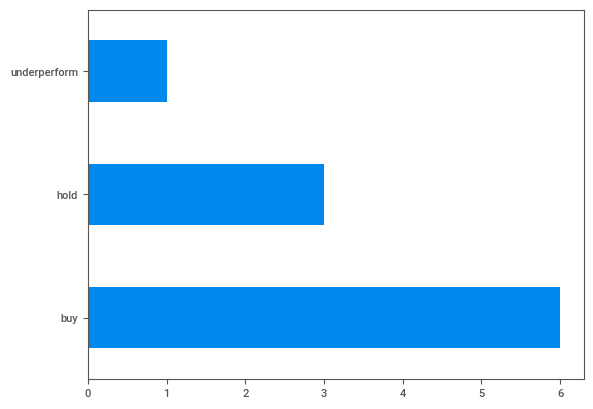

In [ ]:
categoricas['recommendationKey'].value_counts().plot(kind='barh')

## 1.6 Análise bivariada dos dados

Agora iremos relacionar duas variáveis, analisando o comportamento mútuo de ambas.

Escolhemos uma variável categórica e outra quantitativa:


*   **Indústria**
*   **Beta**



In [ ]:
industria_por_beta = pd.crosstab(index=dados_modif['industry'], columns=dados_modif['beta'], margins=True)
industria_por_beta

beta,0.224069,0.401928,0.405252,0.411236,0.444481,0.495013,0.522273,0.560172,0.673869,All
industry,,,,,,,,,,
Utilities—Diversified,0,1,0,0,0,0,1,1,0,3
Utilities—Regulated Electric,1,0,0,1,0,1,0,0,0,3
Utilities—Renewable,0,0,2,0,1,0,0,0,1,4
All,1,1,2,1,1,1,1,1,1,10


Dispondo as informações acima em um gráfico, temos:

<Axes: xlabel='beta', ylabel='industry'>

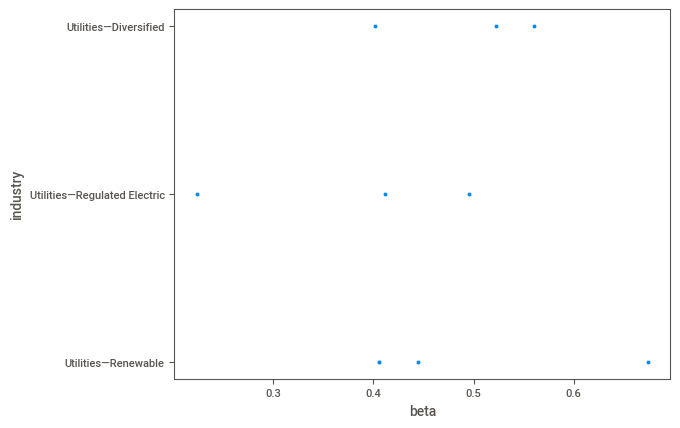

In [ ]:
sns.scatterplot(data=dados_modif, x='beta', y='industry')

## 1.7 Análise multivariada dos dados

Como no exemplo anterior, podemos escolher duas ou mais variáveis para colocar em perspectiva.

As variáveis escolhidas são:
- **Recomendação**
- **Retorno sobre Patrimônio Líquido (ROE)**
- **Margem EBITDA**

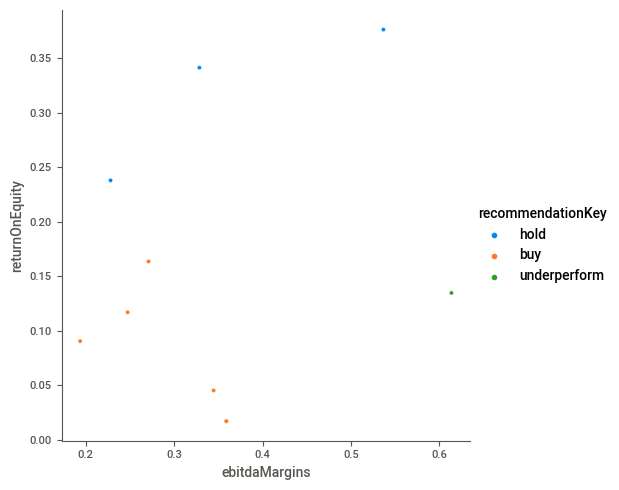

In [ ]:
sns.relplot(data=dados_modif, y='returnOnEquity', x='ebitdaMargins', hue='recommendationKey')

Conclusões do gráfico anterior:

- Empresas que possuem um ROE acima de 0.20, algumas com Margem EBITDA abaixo de 0.4, possuem recomendação neutra.
- Empresas cujo ROE está entre 0.05 e 0.2 e Margem EBITDA está entre 0.2 e 0.4 estão todas com perspectiva de valorização no futuro. Portanto, com recomendação de compra.
- A única empresa com recomendação de venda possui algumas informações interessantes: Possui um ROE de 0.15, superior a boa parte das empresas com recomendação de compra, e possui a maior Margem EBITDA da análise: 0.6.

### 1.7.1 Correlação das variáveis quantitativas

Podemos, também, medir a correlação entre as variáveis quantitativas do estudo em questão.

A correlação é medida da seguinte forma:


corr = 1: Totalmente correlacionado.

corr = -1: Totalmente descorrelacionado.

-1 < corr < 1: Varia entre alta correlação ou alta descorrelação, de acordo com a tendência do número.

In [ ]:
quantitativas.corr()

,payoutRatio,beta,returnOnAssets,returnOnEquity,grossMargins,ebitdaMargins,operatingMargins
payoutRatio,1.000000,-0.404163,-0.261521,-0.239580,0.336962,-0.060261,-0.063833
beta,-0.404163,1.000000,0.297743,0.178857,-0.670367,-0.541899,-0.594124
returnOnAssets,-0.261521,0.297743,1.000000,0.949509,-0.383828,0.031320,0.138250
returnOnEquity,-0.239580,0.178857,0.949509,1.000000,-0.216097,0.216292,0.291002
grossMargins,0.336962,-0.670367,-0.383828,-0.216097,1.000000,0.839993,0.769814
ebitdaMargins,-0.060261,-0.541899,0.031320,0.216292,0.839993,1.000000,0.967161
operatingMargins,-0.063833,-0.594124,0.138250,0.291002,0.769814,0.967161,1.000000


<Axes: >

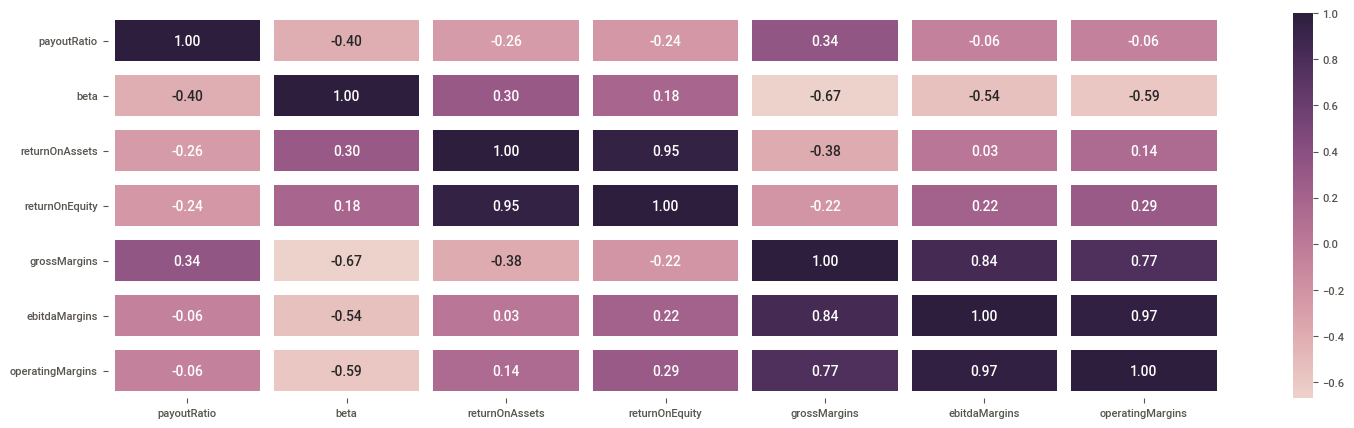

In [ ]:
fig, ax=plt.subplots(figsize=(18,5))
sns.heatmap(quantitativas.corr(), annot=True, fmt='.2f', ax=ax, linewidth=10, cmap=sns.cubehelix_palette(as_cmap=True))

Logo, chegamos em algumas conclusões analisando o gráfico anterior. São:

- O indicador 'Beta' possui uma média/alta descorrelação com os indicadores de Margem (Bruta, Operacional e EBITDA).
- Há uma alta correlação entre ROA e ROE.
- Todos os indicadores de margem possuem uma alta correlação entre si.
- Há uma leve descorrelação entre Payout x ROA e entre Payout x ROE.

## 1.8 Conclusão

Assim, finalizamos o estudo de análise exploratoria de dados, passando pelo processo inicial de tratamento de dados até chegar na visualização gráfica das informações!

Obrigado por chegar até aqui!